Importing Libraties


In [ ]:
# !pip install networkx==2.3
# !pip install mlxtend==0.14.0

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.frequent_patterns import apriori, association_rules
from collections import Counter

from warnings import filterwarnings
filterwarnings("ignore")

Loading Dataset

In [9]:
df=pd.read_csv('/content/Groceries_dataset.csv')
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [10]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
Data Discovery

In [11]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [12]:
df.Member_number.nunique()

3898

In [ ]:
df.Date.nunique()

728

In [ ]:
df['itemDescription'].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

**Grouping Transactions:** The code utilizes the groupby function to organize transaction data in the DataFrame ('df') based on both 'Member_number' and 'itemDescription'. This grouping forms the basis for aggregating information about individual members and the items they have purchased.

**Creating a Transaction Basket:** The grouped data is then transformed into a basket-style DataFrame ('basket'), where each row corresponds to a unique member, and each column represents a specific item. The values in the DataFrame indicate the count of transactions, providing a concise overview of member-specific purchasing behavior.

**Handling Missing Data**: To ensure a comprehensive representation, any missing values in the 'basket' DataFrame are filled with zeros. This step is essential for items that were not purchased by a particular member, allowing for a consistent structure in the dataset and facilitating subsequent analysis of member transaction patterns.

df.groupby(['Member_number','itemDescription'])['Date'].count(): This groups the DataFrame df by 'Member_number' and 'itemDescription', and then counts the number of occurrences of each combination.

unstack(): This reshapes the resulting grouped data, converting the inner level of the multi-index ('itemDescription') into columns, effectively creating a pivot table.

reset_index(): This resets the index of the DataFrame, moving 'Member_number' from the index to a regular column.

fillna(0): This fills any missing (NaN) values with 0, assuming that if a member did not buy a particular item, the count is zero.

set_index('Member_number'): This sets 'Member_number' as the index of the DataFrame.


In [37]:
basket = (df.groupby(['Member_number','itemDescription'])['Date'].count().unstack().reset_index().fillna(0).set_index('Member_number'))

In [38]:
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**encode_units Function:** This function takes a transaction count (x) as input and returns 1 if the count is greater than or equal to 1 (indicating the item was purchased at least once) and returns 0 otherwise (indicating the item was not purchased).

**Applying the Encoding:** The applymap function is used to apply the encode_units function element-wise to all entries in the 'basket' DataFrame. This effectively converts the transaction counts into binary values, where 1 represents a purchase and 0 represents no purchase.

**Displaying the Updated DataFrame:** The code concludes by displaying the first 10 rows of the updated 'basket' DataFrame, where the transaction counts have been encoded into binary values, simplifying the representation to indicate whether each item was purchased or not.

In [39]:
#We are getting the per day transactions (example : 2,4,3) while we just want to know if that particular item is purchased or not
#thus we are encoding units as 1(if purchased) or 0(not purchased)

def encode_units(x):
    if x < 1:
        return 0
    if x >= 1:
        return 1


basket = basket.applymap(encode_units)
basket.head(10)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


**Association Rule Mining usinf mlxtend**


In [43]:
# trying out on a sample item
whole_milk_df = basket.loc[basket['whole milk']==1]
# Using apriori algorithm, creating association rules for the sample item

# Applying apriori algorithm for whole_milk_df
frequent_itemsets = apriori(whole_milk_df, min_support=0.15, use_colnames=True)
# Storing the association rules into rules
whole_milk_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
# Sorting the rules on lift and support
whole_milk_rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(yogurt),(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,0.019493,1.113401,0.185208
1,"(whole milk, yogurt)",(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,0.019493,1.113401,0.185208
2,(yogurt),"(whole milk, other vegetables)",0.328667,0.417693,0.156775,0.477002,1.141991,0.019493,1.113401,0.185208
3,(other vegetables),(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,0.019493,1.074708,0.213523
4,"(whole milk, other vegetables)",(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,0.019493,1.074708,0.213523
5,(other vegetables),"(whole milk, yogurt)",0.417693,0.328667,0.156775,0.375335,1.141991,0.019493,1.074708,0.213523
6,(rolls/buns),(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,0.016397,1.077887,0.149954
7,(other vegetables),(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,0.016397,1.068745,0.157163
8,"(whole milk, rolls/buns)",(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,0.016397,1.077887,0.149954
9,"(whole milk, other vegetables)",(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,0.016397,1.068745,0.157163


Creating a new function in which we pass an item name and it returns the items which are frequently bought together
In other words, it returns the items which are likely to be bought by user because he bought the item passed into function

In [33]:
def frequently_bought_together(item):

    # df of item passed
    item_df = basket.loc[basket[item]==1]

    # Applying apriori algorithm on item df
    frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)

    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Sorting on lift and support
    rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)

    print('Items frequently bought together with {0}'.format(item))
    # Returning top 6 items with highest lift and support
    return rules['consequents'].unique()[:6]


In [44]:
# Lets try yogurt
frequently_bought_together('yogurt')

Items frequently bought together with yogurt


array([frozenset({'yogurt'}), frozenset({'bottled beer'}),
       frozenset({'bottled water'}), frozenset({'butter'}),
       frozenset({'canned beer'}), frozenset({'citrus fruit'})],
      dtype=object)

In [45]:
# Lets try white bread
frequently_bought_together('white bread')

Items frequently bought together with white bread


array([frozenset({'bottled beer'}), frozenset({'white bread'}),
       frozenset({'bottled water'}), frozenset({'whole milk'}),
       frozenset({'brown bread'}), frozenset({'butter'})], dtype=object)

Visulization of association rule

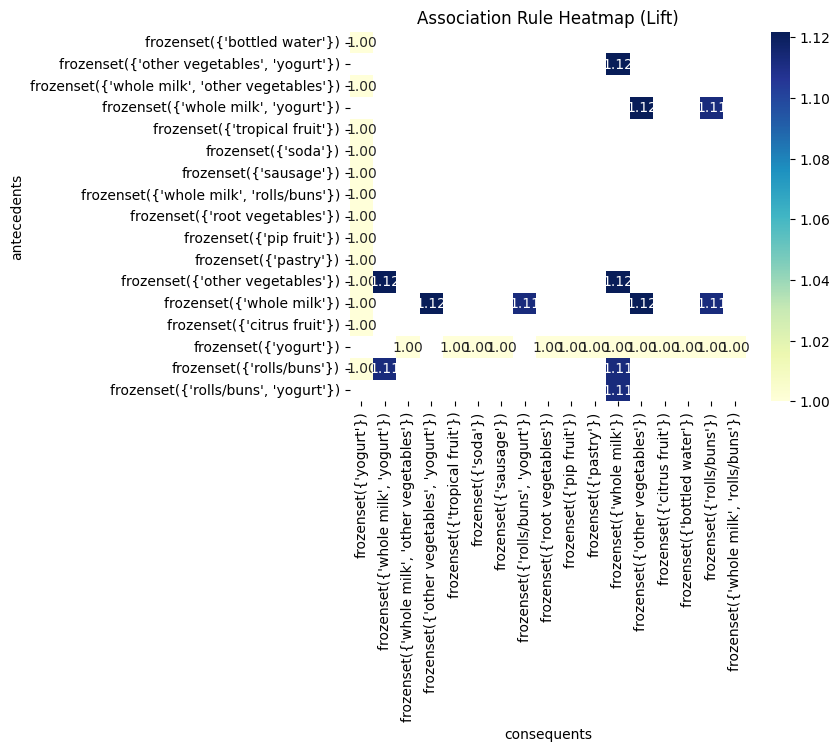

In [46]:
import seaborn as sns

cat_df = basket.loc[basket['yogurt']==1]
frequent_itemsets = apriori(cat_df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Create a DataFrame for visualization
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values='lift')

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Association Rule Heatmap (Lift)')
plt.show()

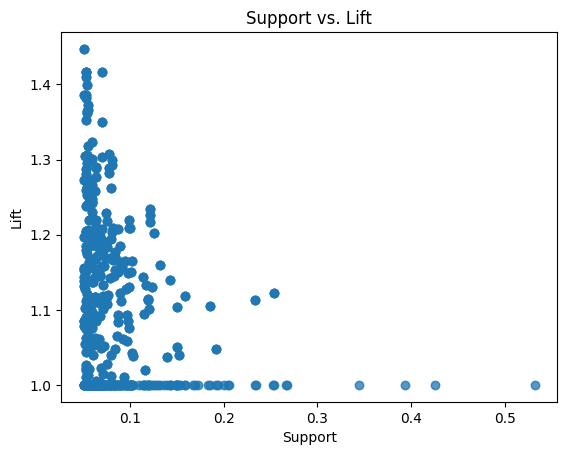

In [47]:
cat_df = basket.loc[basket['yogurt']==1]
frequent_itemsets = apriori(cat_df, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs. Lift')
plt.show()